In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-dataset/repository_data.csv
/kaggle/input/github-dataset/github_dataset.csv


# GithubDataSet
## 数据摘要和可视化
### 数据摘要

In [2]:
import numpy as np
import pandas as pd
# 读取数据集
github_dataset_path = "/kaggle/input/github-dataset/github_dataset.csv"
github_dataset = pd.read_csv(github_dataset_path)
# 查看部分数据集
github_dataset.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


#### 标称属性：查看language属性各个取值的频数

In [13]:
print(github_dataset["language"].value_counts())

language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

#### 数值属性：给出stars_count, forks_count, issues_count, pull_requests, contributors五个属性的五数概括(这五个属性的取值为数值），五数分别是最小值，下四分位数，中位数，上四分位数，最大值

In [17]:
stars_count = github_dataset['stars_count']
forks_count = github_dataset['forks_count']
issues_count = github_dataset['issues_count']
pull_requests = github_dataset['pull_requests']
contributor = github_dataset['contributors']

summary = pd.DataFrame({
    'Attribute': ['Stars Count', 'Forks Count', 'Issues Count', 'Pull Requests', 'Contributor'],
    'Minimum': [stars_count.min(), forks_count.min(), issues_count.min(), pull_requests.min(), contributor.min()],
    '0.25': [stars_count.quantile(0.25), forks_count.quantile(0.25), issues_count.quantile(0.25), pull_requests.quantile(0.25), contributor.quantile(0.25)],
    'Median': [stars_count.median(), forks_count.median(), issues_count.median(), pull_requests.median(), contributor.median()],
    '0.75': [stars_count.quantile(0.75), forks_count.quantile(0.75), issues_count.quantile(0.75), pull_requests.quantile(0.75), contributor.quantile(0.75)],
    'Maximum': [stars_count.max(), forks_count.max(), issues_count.max(), pull_requests.max(), contributor.max()]
})
print(summary)

       Attribute  Minimum  0.25  Median   0.75  Maximum
0    Stars Count        0   1.0    12.0  65.25      995
1    Forks Count        0   1.0     6.0  38.25      973
2   Issues Count        1   1.0     2.0   6.00      612
3  Pull Requests        0   0.0     0.0   2.00      567
4    Contributor        0   0.0     2.0   4.00      658


#### 计算缺失值的个数

In [20]:
Nans = github_dataset.isna().sum()
print(Nans)

repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64


* 只有language属性出现确实

### 数据可视化
#### 直方图
* language的属性适合使用直方图展现

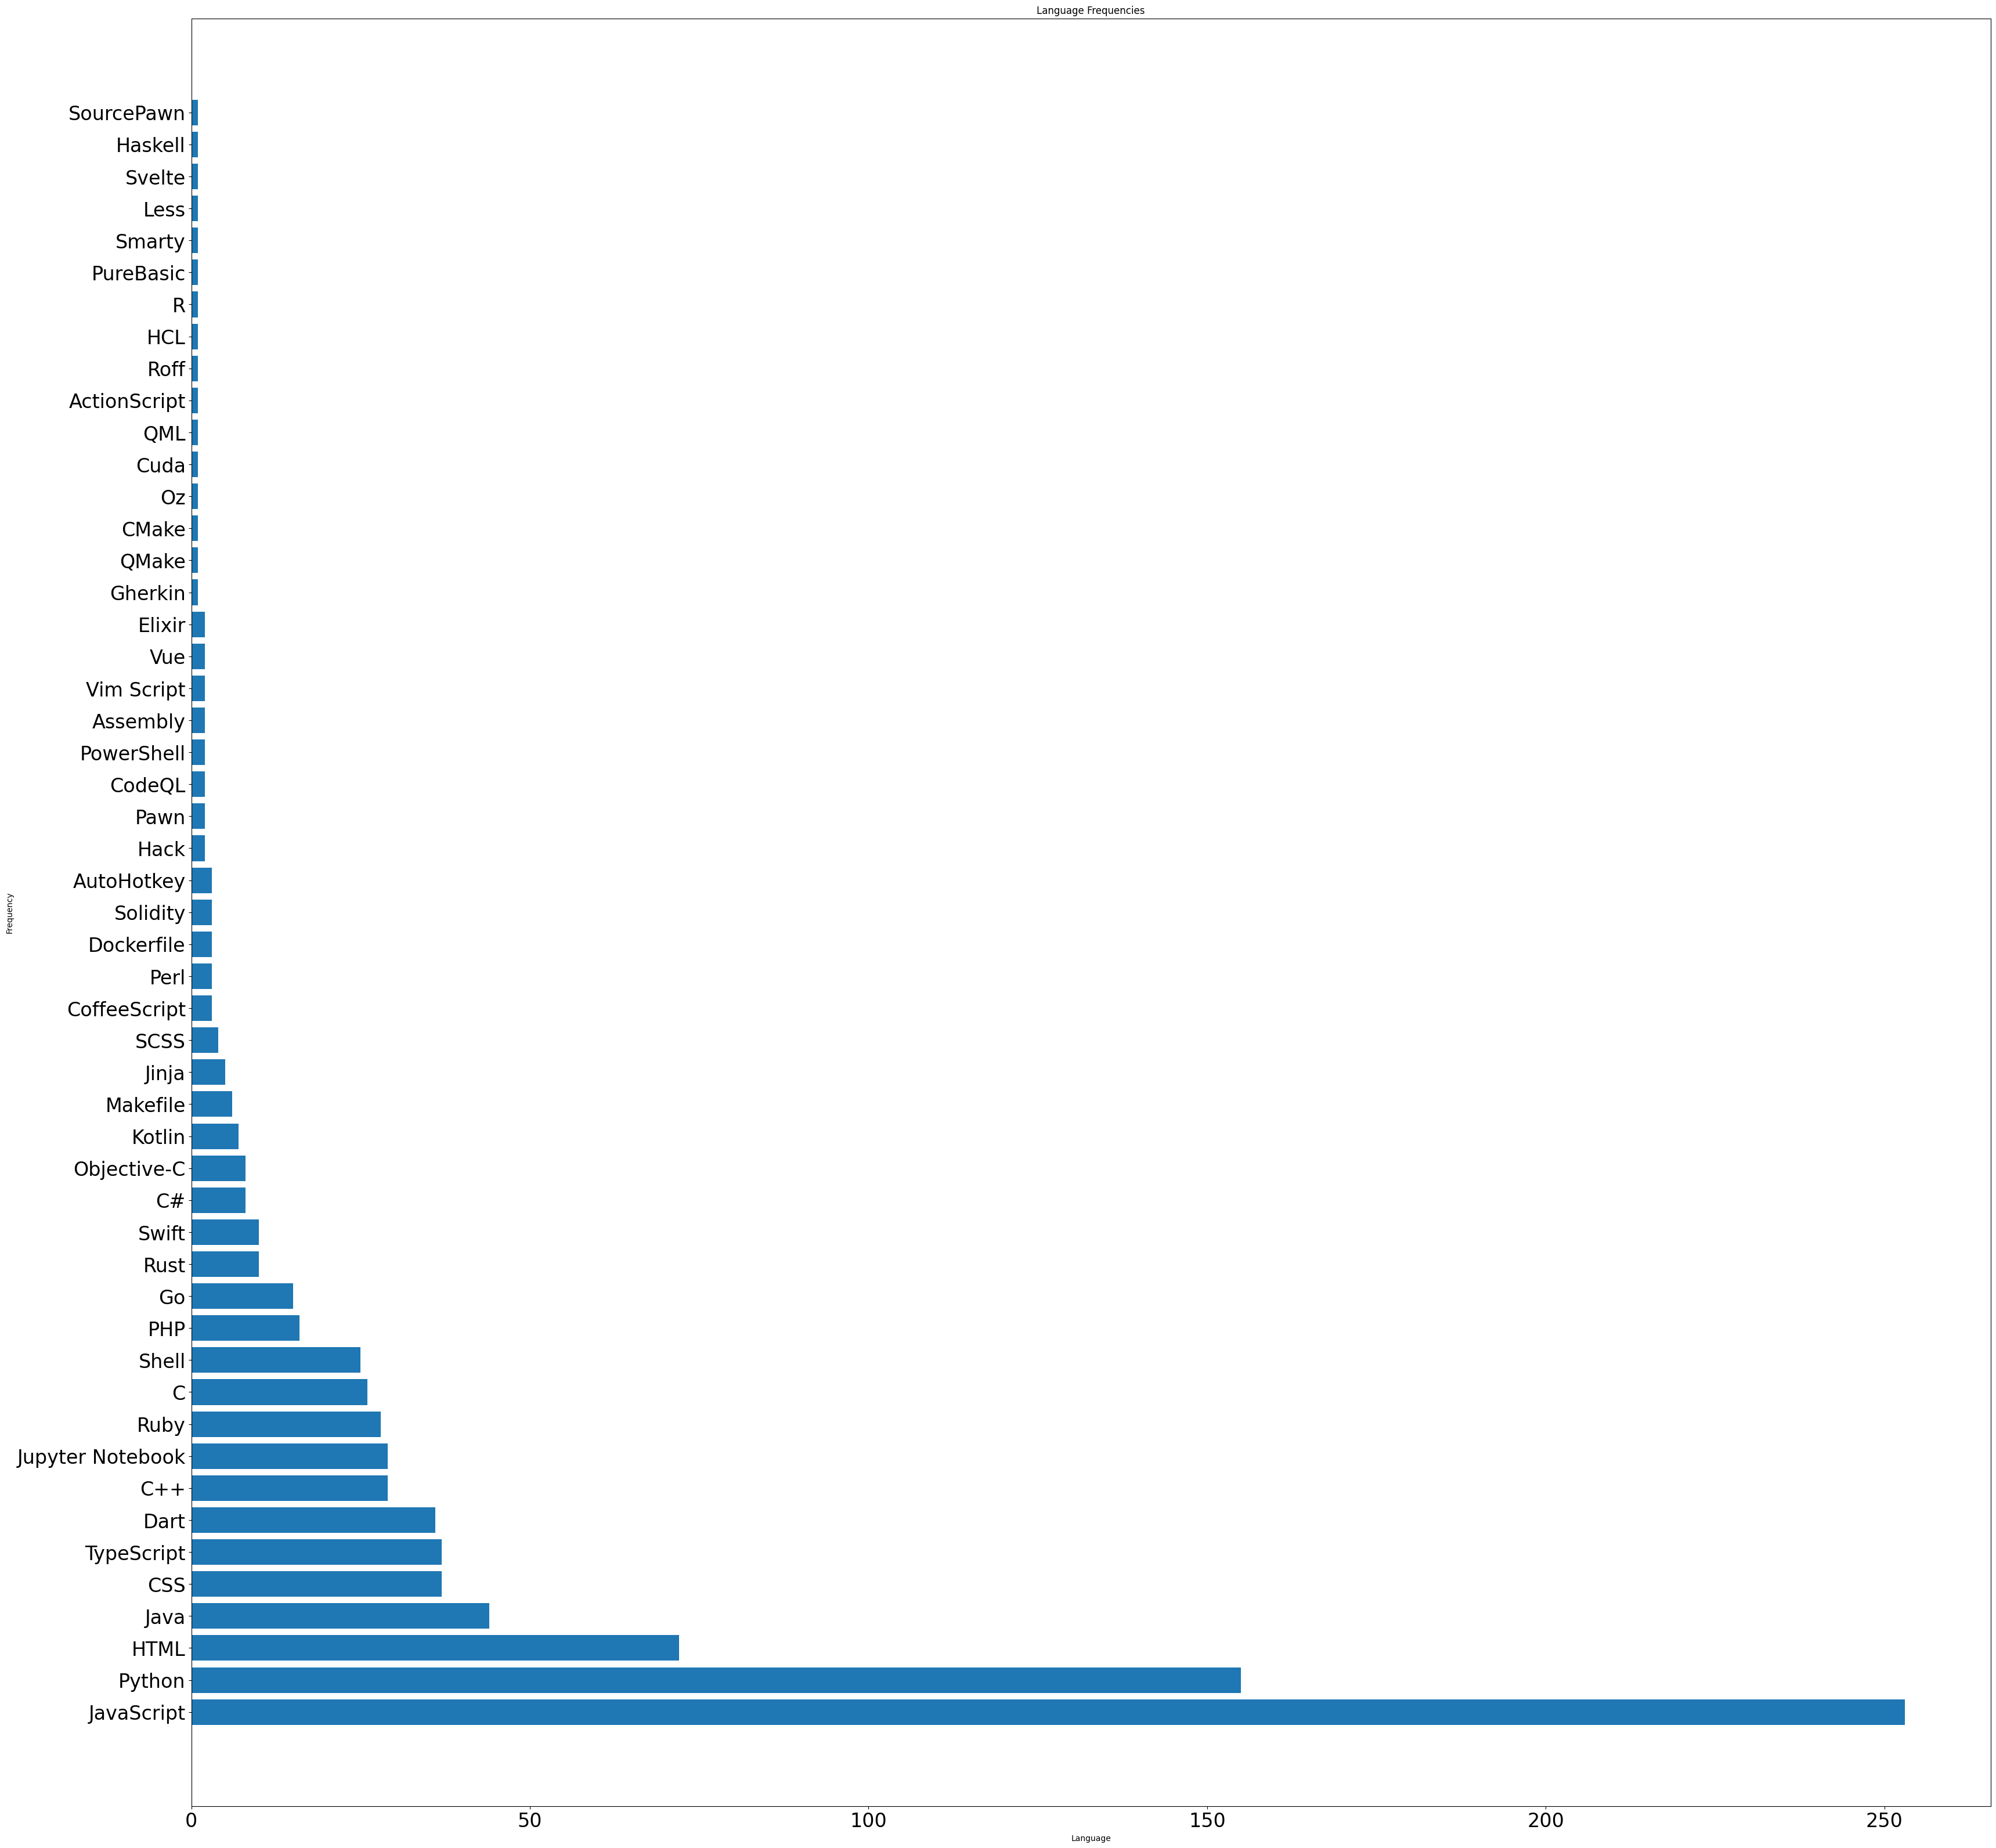

In [5]:
import matplotlib.pyplot as plt
language = github_dataset["language"]

language_counts =  language.value_counts()
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24) 
plt.barh(language_counts.index, language_counts.values)
plt.title("Language Frequencies")
plt.xlabel("Language")
plt.ylabel("Frequency")

plt.show()


#### 盒图
* stars_count, forks_count, issues_count, pull_requests, contributors使用盒图展现

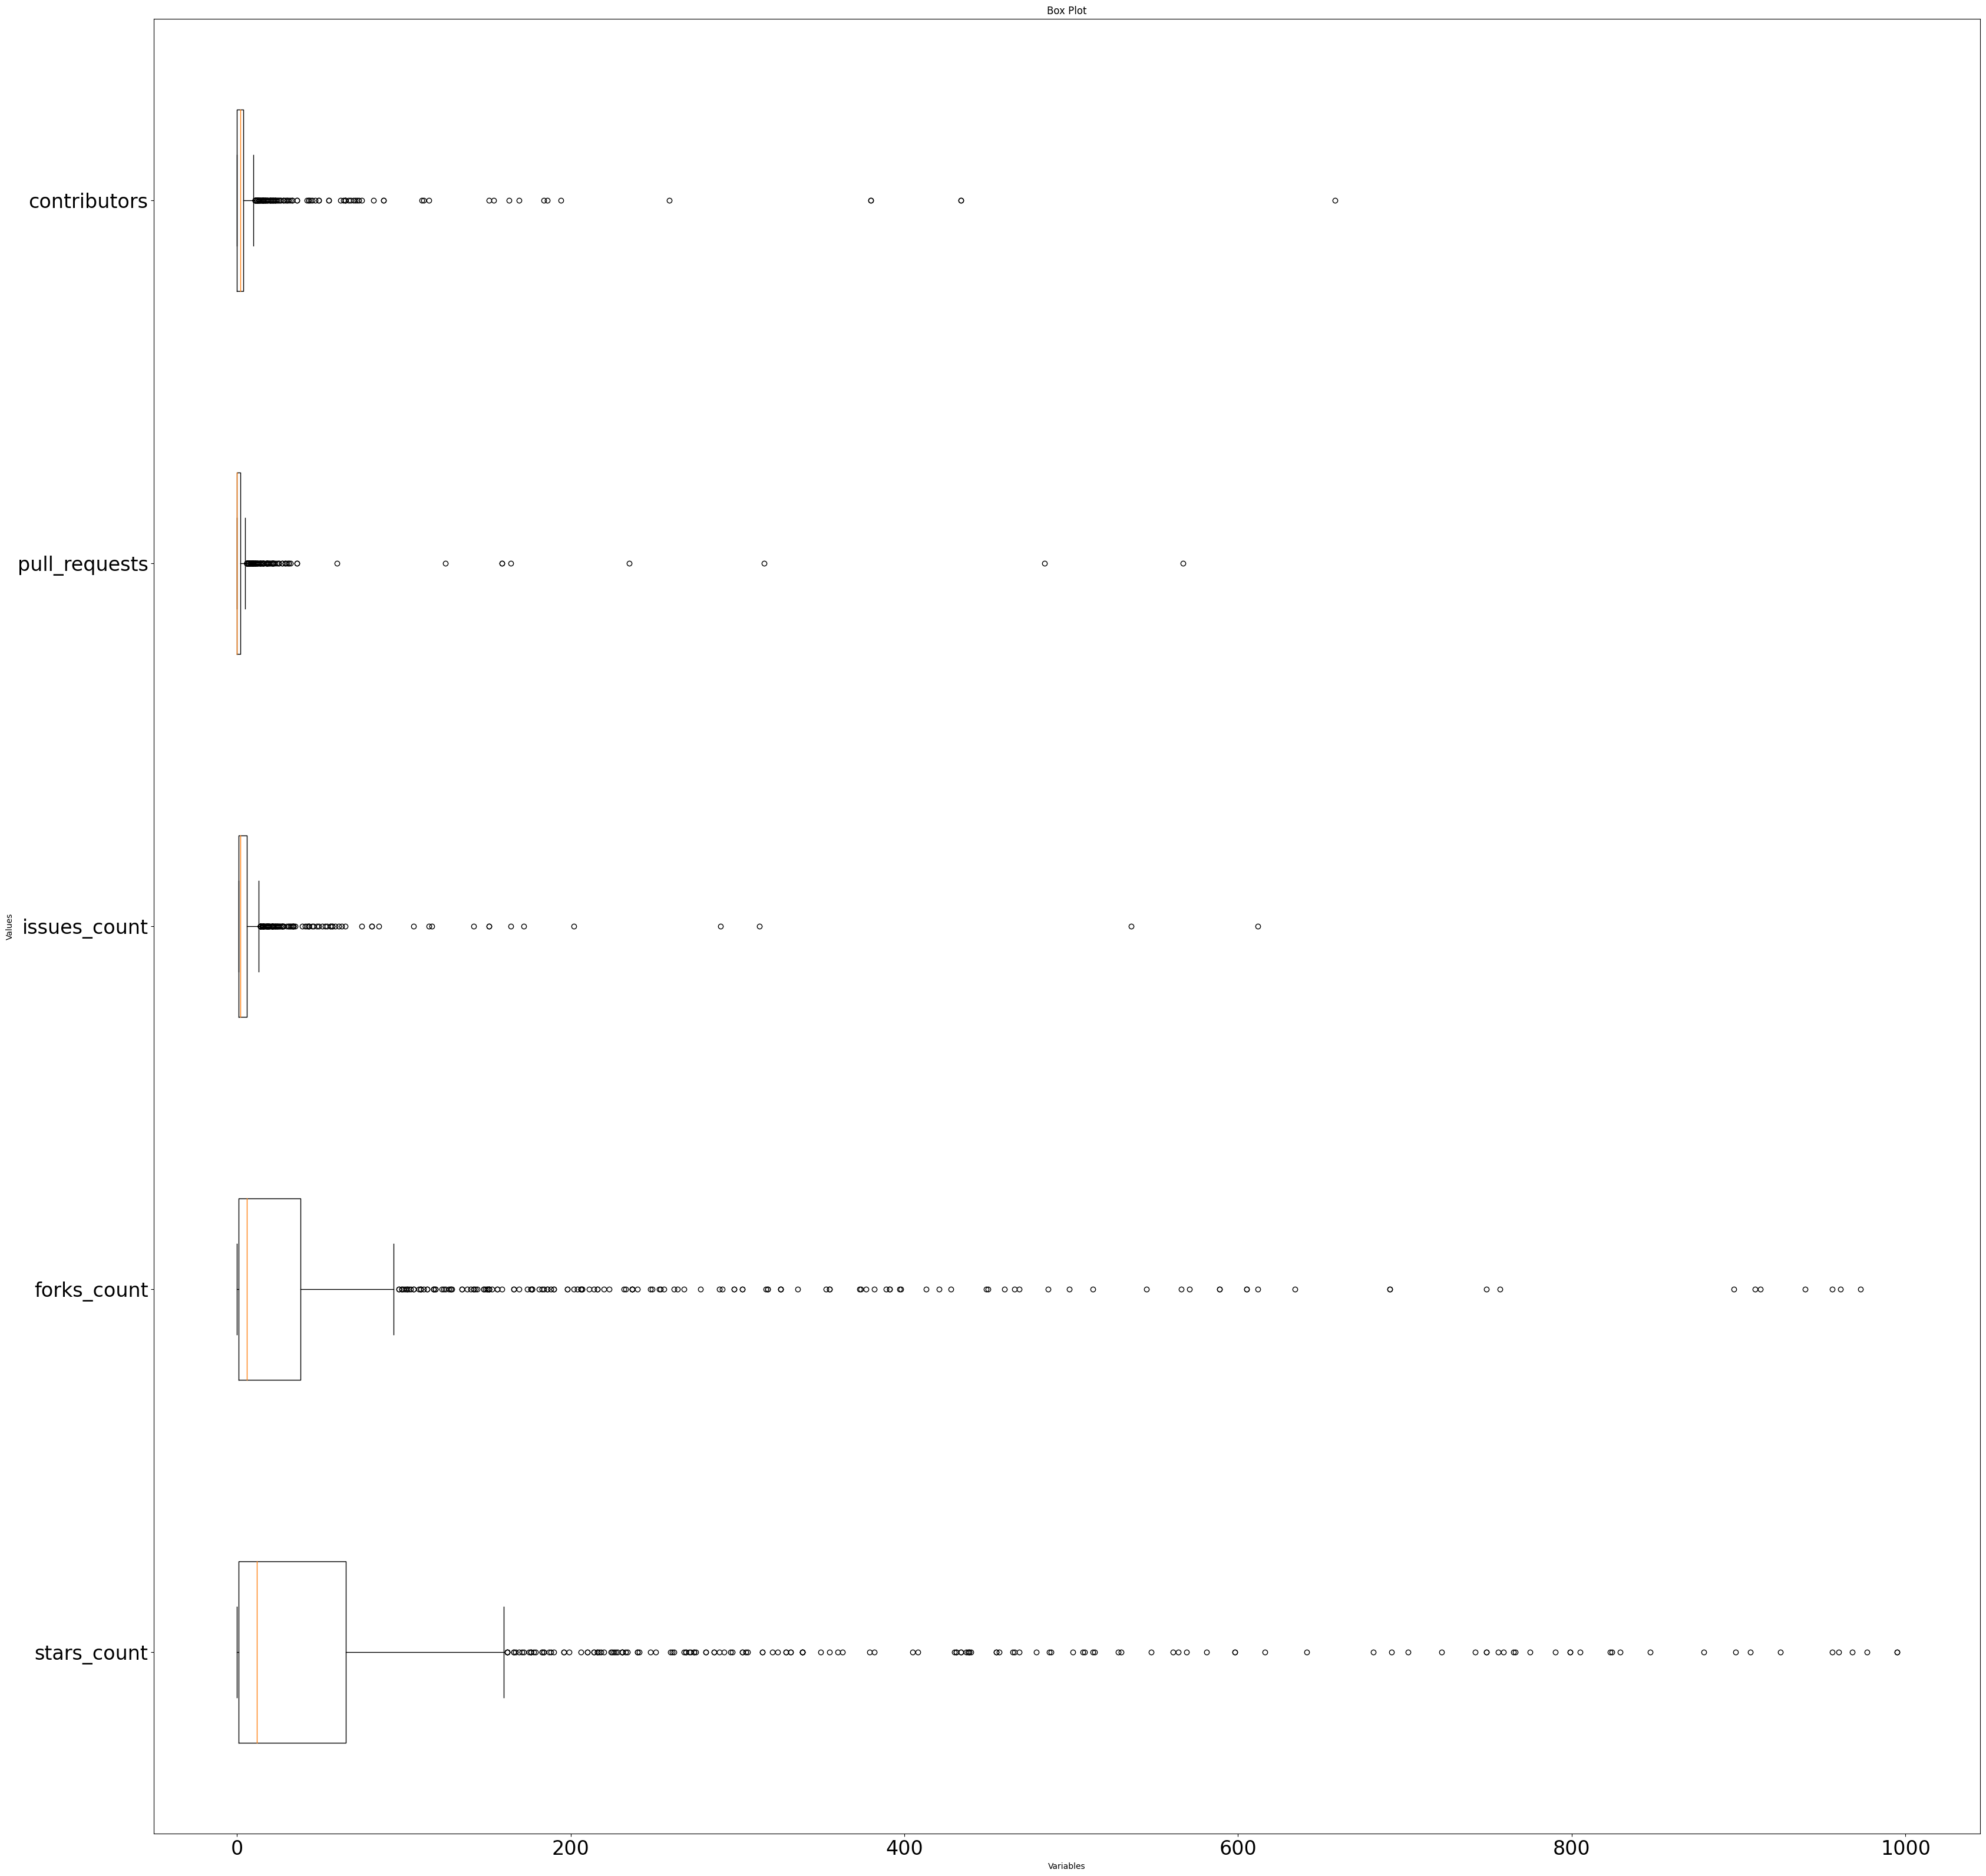

In [46]:
datas = github_dataset[["stars_count","forks_count","issues_count" , "pull_requests", "contributors"]]
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.boxplot(datas.values, vert=False)

# 添加标题和标签
plt.title("Box Plot")
plt.xlabel("Values")
plt.ylabel("Variables")

# 设置 x 轴刻度标签
plt.yticks(range(1, len(datas.columns) + 1), datas.columns)

# 显示图形
plt.show()

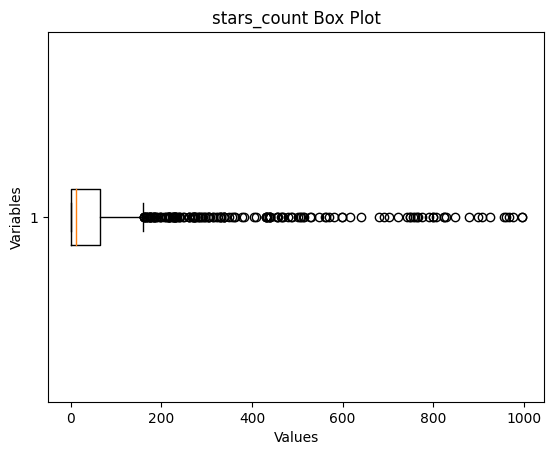

In [53]:
datas = github_dataset["stars_count"]

plt.boxplot(datas, vert=False)

# 添加标题和标签
plt.title("stars_count Box Plot")
plt.xlabel("Values")
plt.ylabel("Variables")

# 设置 x 轴刻度标签

# 显示图形
plt.show()

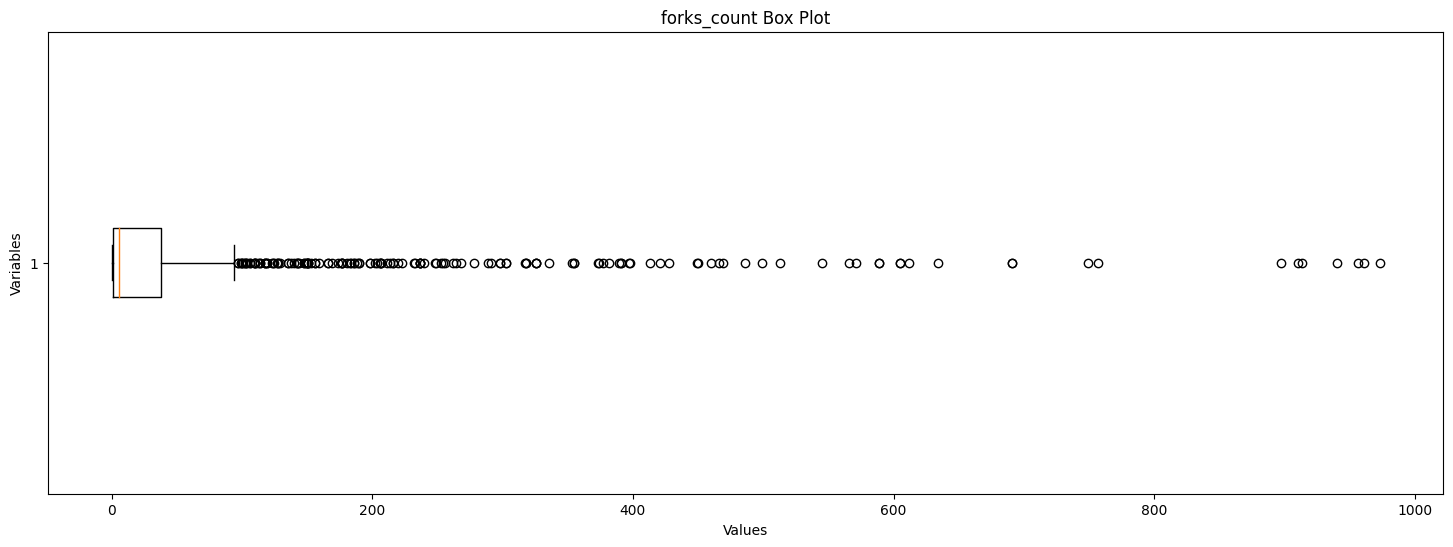

In [59]:
datas = github_dataset["forks_count"]
plt.figure(figsize=(18, 6))

plt.boxplot(datas, vert=False)

# 添加标题和标签
plt.title("forks_count Box Plot")
plt.xlabel("Values")
plt.ylabel("Variables")

# 设置 x 轴刻度标签

# 显示图形
plt.show()

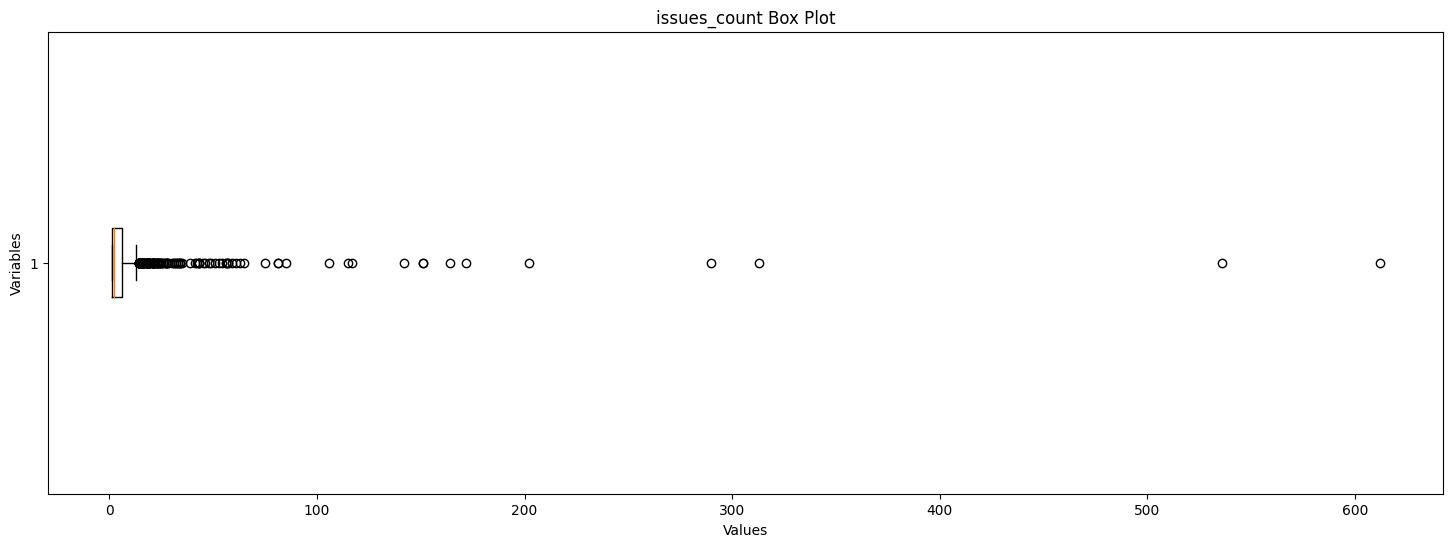

In [60]:
datas = github_dataset["issues_count"]
plt.figure(figsize=(18, 6))
plt.boxplot(datas, vert=False)

# 添加标题和标签
plt.title("issues_count Box Plot")
plt.xlabel("Values")
plt.ylabel("Variables")

# 设置 x 轴刻度标签

# 显示图形
plt.show()

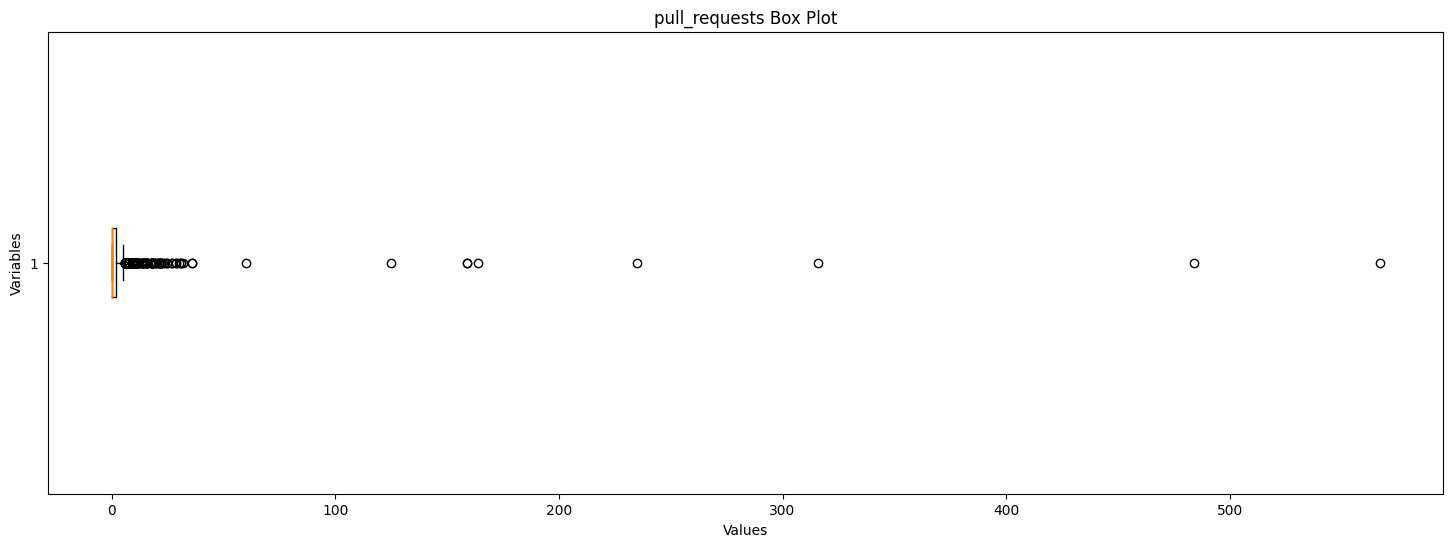

In [61]:
datas = github_dataset["pull_requests"]
plt.figure(figsize=(18, 6))
plt.boxplot(datas, vert=False)

# 添加标题和标签
plt.title("pull_requests Box Plot")
plt.xlabel("Values")
plt.ylabel("Variables")

# 设置 x 轴刻度标签

# 显示图形
plt.show()

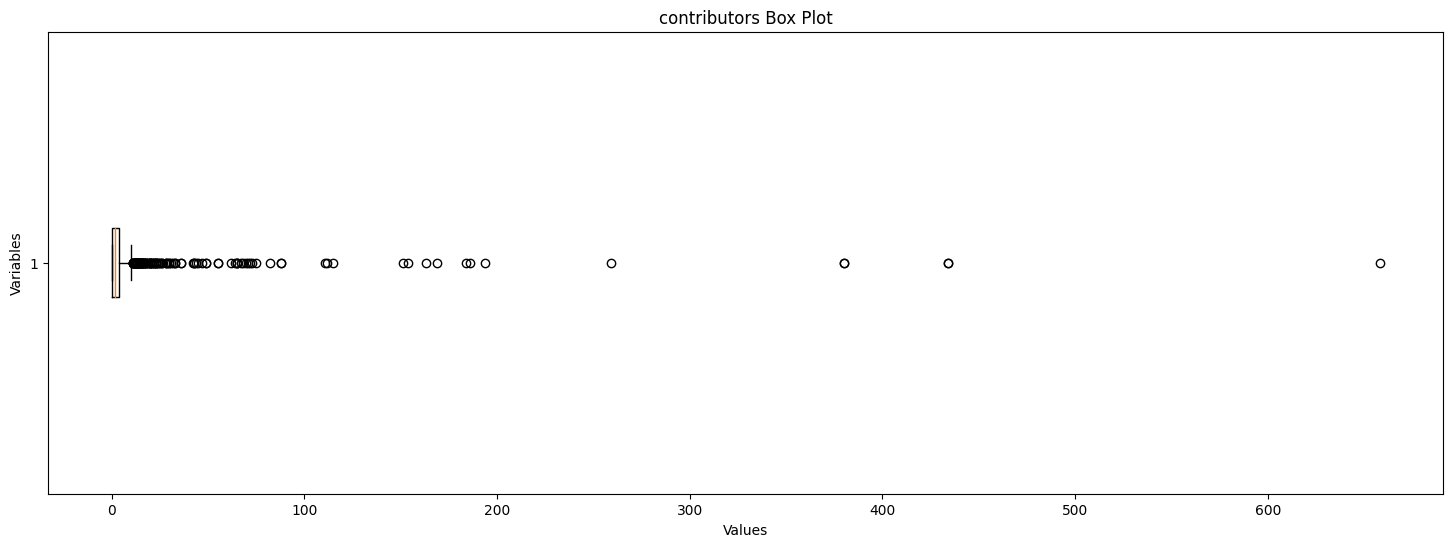

In [62]:
datas = github_dataset["contributors"]
plt.figure(figsize=(18, 6))
plt.boxplot(datas, vert=False)

# 添加标题和标签
plt.title("contributors Box Plot")
plt.xlabel("Values")
plt.ylabel("Variables")

# 设置 x 轴刻度标签

# 显示图形contributors
plt.show()

## 数据缺失和处理
### 将缺失部分剔除

In [70]:
print("处理之前打印缺失个数：")
print(github_dataset.isna().sum())
print("处理之前数据形状：")
print(github_dataset.shape)
data_without_missing = github_dataset.dropna()
print("处理之后打印缺失个数")
print(data_without_missing.isna().sum())
print("处理之后数据形状：")
print(data_without_missing.shape)

处理之前打印缺失个数：
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64
处理之前数据形状：
(1052, 7)
处理之后打印缺失个数
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64
处理之后数据形状：
(907, 7)


#### 

### 最高频率填补缺失

In [83]:
github_dataset = pd.read_csv(github_dataset_path)
print(github_dataset["language"].value_counts())
print("处理之前最多的：")
language = github_dataset["language"]
language_counts =  language.value_counts()
print(language_counts.max())
# 计算指定列的最高频率值
most_frequent_value = github_dataset["language"].mode().iloc[0]
print("频率最高的：")
print(most_frequent_value)
# 使用最高频率值填补指定列的缺失值
github_dataset["language"].fillna(most_frequent_value, inplace=True)
print(github_dataset["language"].value_counts())
print("处理之后最多的：")
language = github_dataset["language"]
language_counts =  language.value_counts()
print(language_counts.max())


language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

* 使用JavaScript填补了所有的nan

### 通过属性的相关关系来填补缺失值
* 使用corr函数来计算相关系数

In [18]:
github_dataset = pd.read_csv(github_dataset_path)
# 字符串不能与数值计算相关性，先将language进行编码
one_hot_code = pd.get_dummies(github_dataset, columns=['language'], dummy_na=True, drop_first=True)
one_hot_code.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language_Assembly,language_AutoHotkey,language_C,language_C#,...,language_Shell,language_Smarty,language_Solidity,language_SourcePawn,language_Svelte,language_Swift,language_TypeScript,language_Vim Script,language_Vue,language_nan
0,octocat/Hello-World,0,0,612,316,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,EddieHubCommunity/support,271,150,536,6,71,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,ethereum/aleth,0,0,313,27,154,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,localstack/localstack,0,0,290,30,434,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,education/classroom,0,589,202,22,67,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
import seaborn

Text(0.5, 1.0, 'Correlation')

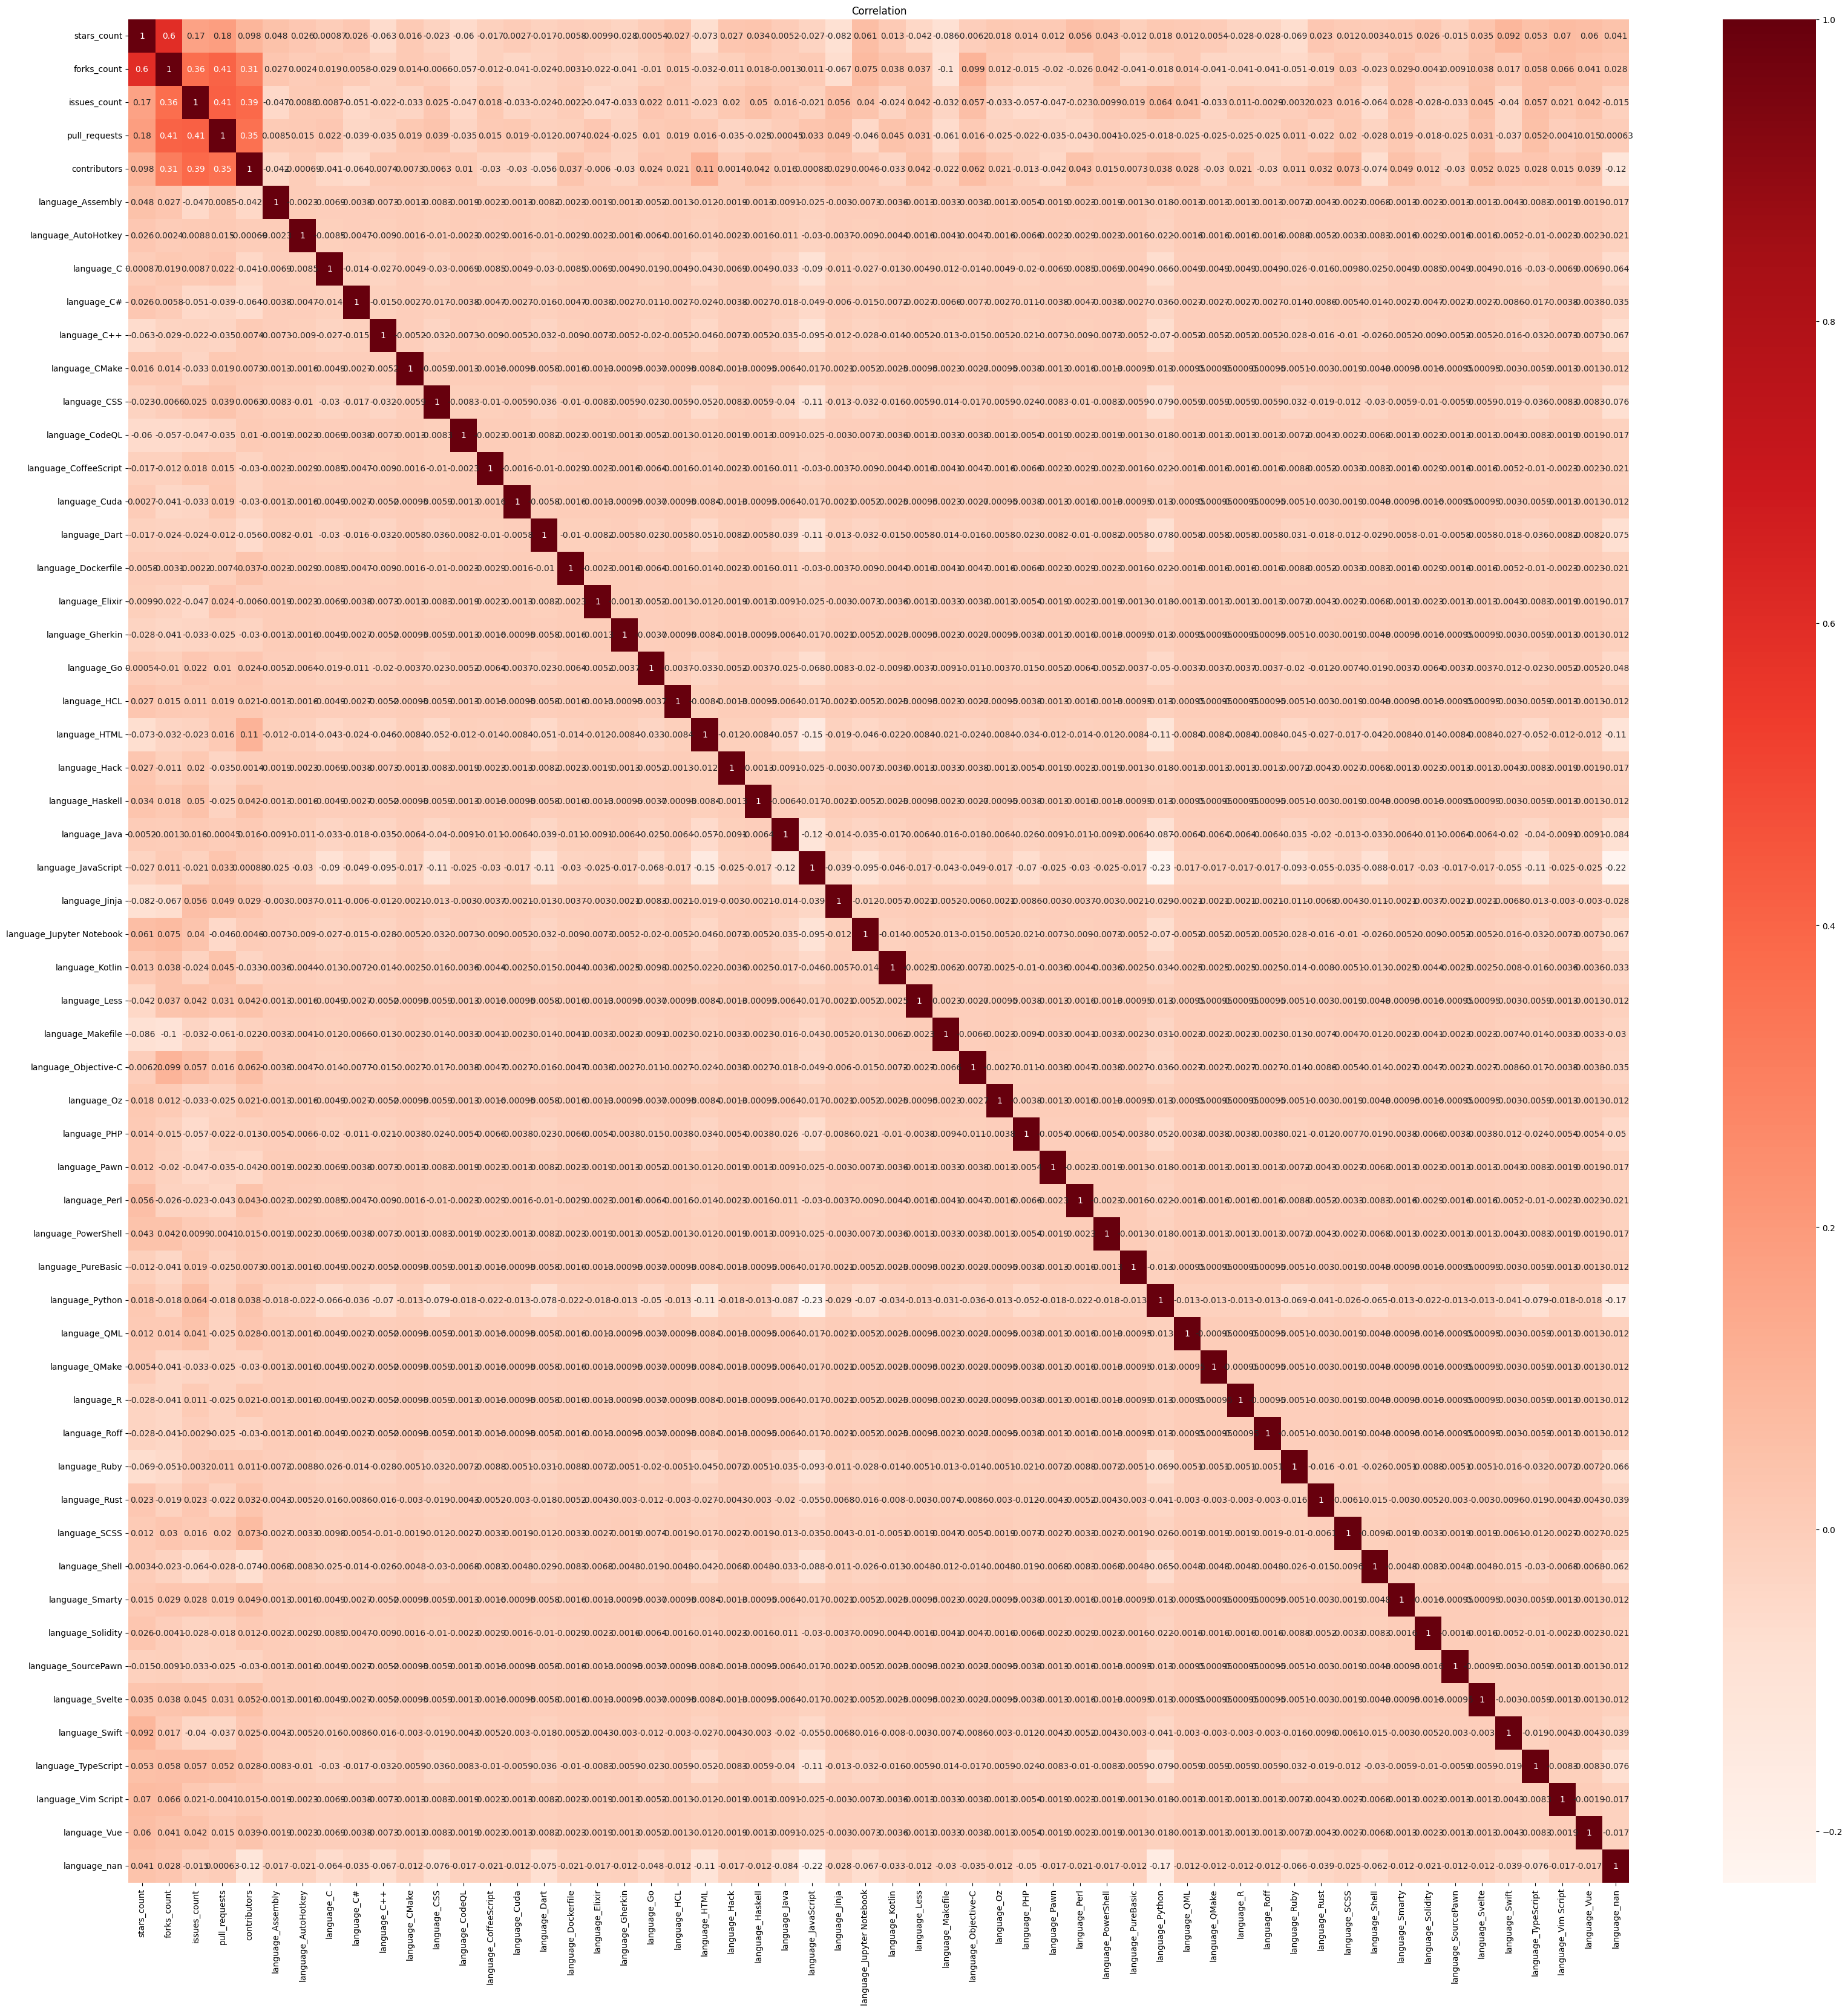

In [21]:
plt.figure(figsize=(40, 40))
one_hot_code = one_hot_code.select_dtypes(include=['float64', 'int64','bool'])
seaborn.heatmap(one_hot_code.corr(method='spearman'), cmap='Reds', annot=True)
plt.title('Correlation')

In [27]:

github_dataset_tmp = github_dataset
agg = github_dataset_tmp.groupby('language').agg(avg=('stars_count', 'mean'))
for i in range(len(github_dataset_tmp)):
    if github_dataset_tmp['language'].iloc[i] is np.nan:
        rate = github_dataset_tmp['stars_count'].iloc[i]
        dist = []
        for j in range(len(agg)):
            dist.append(abs(agg.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_dataset_tmp['language'].iloc[i] = agg.index[idx]

In [28]:
github_dataset_tmp['language'].value_counts()

language
JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir 

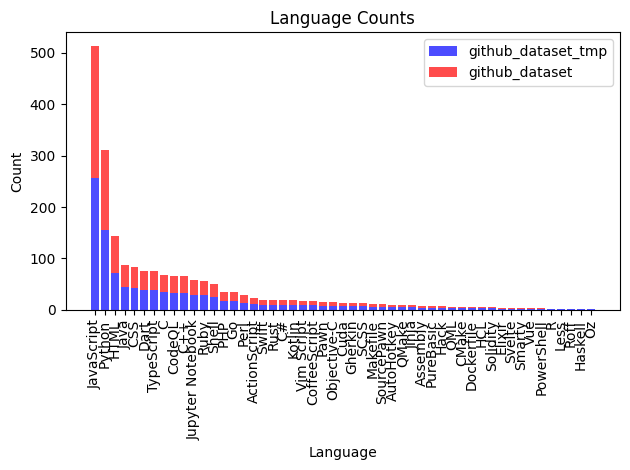

In [35]:

counts_tmp = github_dataset_tmp['language'].value_counts()
counts = github_dataset['language'].value_counts()
languages_tmp = counts_tmp.index
languages = counts.index
data_tmp = counts_tmp.values
data = counts.values
colors = ['blue', 'red']

# 设置柱状图的位置
x = np.arange(len(languages))

# 绘制直方图
plt.bar(x, data_tmp, color=colors[0], alpha=0.7, label='github_dataset_tmp')
plt.bar(x, data, bottom=data_tmp, color=colors[1], alpha=0.7, label='github_dataset')

# 设置x轴标签和刻度
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Counts')
plt.xticks(x, languages, rotation='vertical')

# 添加图例
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

### 通过数据对象之间的相似性来填补缺失值
* 利用数值列，计算五个数值之间的余弦相似度进行填充

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
github_dataset = pd.read_csv(github_dataset_path)


data = github_dataset
column_to_impute = 'language'

# 要计算相似值的五个列名
columns_to_compare = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]

# 计算五个列之间的相似值矩阵
similarity_matrix = cosine_similarity(data[columns_to_compare])
# 遍历数据，填充缺失值
for index, row in data.iterrows():
    if pd.isnull(row[column_to_impute]):
        # 获取当前行的索引
        row_index = row.name
        
        
        # 获取当前行与其他行的相似值
        similarities = similarity_matrix[row_index]
        # 找到最相似的行的索引,而且这个索引下language的值不能为空
        most_similar_index = -1
        for i in range(len(similarities)):
            most_similar_index = np.nanargmax(similarities)
            if pd.isnull(data[column_to_impute][most_similar_index]):
                similarities[most_similar_index] = -100
                continue
            break
        # 获取最相似的行的值来填充缺失值
        imputed_value = data.loc[most_similar_index, column_to_impute]
        # 填充缺失值
        data.loc[row_index, column_to_impute] = imputed_value


Nans = data.isna().sum()
print(Nans)

repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64


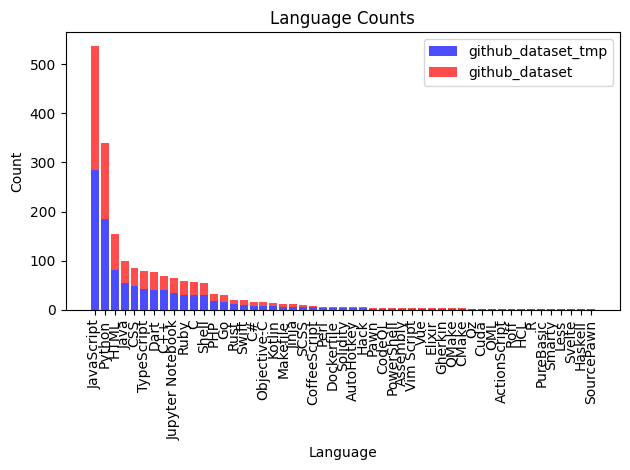

In [69]:
github_dataset = pd.read_csv(github_dataset_path)
github_dataset1 = data
counts_tmp = github_dataset1['language'].value_counts()
counts = github_dataset['language'].value_counts()
languages_tmp = counts_tmp.index
languages = counts.index
data_tmp = counts_tmp.values
data = counts.values
colors = ['blue', 'red']

# 设置柱状图的位置
x = np.arange(len(languages))

# 绘制直方图
plt.bar(x, data_tmp, color=colors[0], alpha=0.7, label='github_dataset1')
plt.bar(x, data, bottom=data_tmp, color=colors[1], alpha=0.7, label='github_dataset')

# 设置x轴标签和刻度
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Counts')
plt.xticks(x, languages, rotation='vertical')

# 添加图例
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()